## Heterogenous risk modeling compartmental models 
**Background:**
This lab assumes that the student has learned about the theory of compartmental models and how to implement these systems in a computer. 
Compartmental models typcially make strong assumptions about how a set of animals come in contact with one another. 
Most compartmental models assume that our population is **well-mixed**,
A **well-mixed** population is one in which every animal contacts every other animal within one time unit. 

The assumption of well-mixing puts all animals at the same risk for an infection, and is likely an unreasonable assumption.
For example, a model that wants to characterize a sexually transmited infection (STI) will often want to take into account that hosts who have a larger number of contacts within one time point are at higher risk than those who have a fewer number of contacts. 
Another example is the modeling of an infectious agent at the level of a city or larger.
If we assume well-mixing then we assume that every individual in the city makes contact with everyone else.
Instead it may make more sense to assume that specific regions of the city are well-mixed and in between regions have low levels of contact or none at all. 
A final example is influenza.
The risk of influenza often depends on one's age.
Individuals who are 17 or under and who are 65 and older are at higher risk of infection from influenza compared to adults 18-64. 

A model that incorporates **heterogenous risk** assigns different risks of infection to each animal in the system based on a set of characteristics.
In our above examples we may assume risk depends on the number of sexual contacts (those around us), location in the city where one lives or works (our location), and an individuals age (personal attributes). 

#### A SIR approach to modeling heterogenous risk

One approach to incorporating heterogenous risk is to (i) stratify a population of $N$ animals into groups based on their risk of infection and (ii) describe how these strata interact over time. 
This approach must describe how those in the same strata interact and how those between all strata interact.

Suppose that individuals can be stratified into two groups: high risk or low risk.
Within each group we expect the proportion of susceptible, infected, and removed individuals to follow the SIR system of differential equations---with one change. 
Individuals who are susceptible in the high risk (low risk) group come in contact with individuals who are infected in the low risk (high risk) group. 
$$
\begin{align}
    &\begin{aligned}
        (N_{\text{low}} S_{\text{low}})' &= -\lambda_{1} S_{\text{low}} \left(N_{\text{low}}I_{\text{low}}\right) -\omega S_{\text{low}} \left(N_{\text{high}}I_{\text{high}}\right) \\ 
        (N_{\text{low}} I_{\text{low}})' &= \lambda_{1} S_{\text{low}} \left(N_{\text{low}}I_{\text{low}}\right) + \omega S_{\text{low}} \left(N_{\text{high}}I_{\text{high}}\right) - \gamma (N_{\text{low}}I_{\text{low}}) \\ 
        (N_{\text{low}} R_{\text{low}})' &= \gamma (N_{\text{low}}I_{\text{low}})\\
    \end{aligned}\\ 
    \nonumber\\ 
    &\begin{aligned}
        (N_{\text{high}} S_{\text{high}})' &= -\lambda_{2} S_{\text{high}} \left(N_{\text{high}}I_{\text{high}}\right) -\omega S_{\text{high}} \left(N_{\text{low}}I_{\text{low}}\right) \\ 
        (N_{\text{high}} I_{\text{high}})' &= \lambda_{2} S_{\text{high}} \left(N_{\text{high}}I_{\text{high}}\right) + \omega S_{\text{high}} \left(N_{\text{low}}I_{\text{low}}\right) - \gamma (N_{\text{high}}I_{\text{high}}) \\ 
        (N_{\text{high}} R_{\text{high}})' &= \gamma (N_{\text{high}}I_{\text{high}})\\
    \end{aligned}\\
    \\
    &S_{\textrm{low risk}}(0) = S_{0,\textrm{low risk}}; \; I_{\textrm{low risk}}(0) = I_{0,\textrm{low risk}}; \; R_{\textrm{low risk}}(0) = R_{0,\textrm{low risk}}\\
    &S_{\textrm{high risk}}(0) = S_{0,\textrm{high risk}}; \; I_{\textrm{high risk}}(0) = I_{0,\textrm{high risk}}; \; R_{\textrm{high risk}}(0) = R_{0,\textrm{high risk}}
\end{align}
$$

where $\lambda_{1}$ describes the average number of contacts between an infector in the low risk group and susceptible in the low risk group, $\lambda_{2}$ describes the average number of contacts between an infector and susceptible in the high risk group, and   
\omega describes the average number of contacts between infectors and suscpetibles **between** high risk and low risk individuals. 
The parameter $1/\gamma$ describes the duration of the infectious period.

The above summarizes how the proportion of susceptible, infected, and removed individuals in the high risk and low risk groups propogate over time. 
We simplified our above model by assuming the same $\gamma$ for the high risk and low risk, that is, we assume the same duration of the infectious period $(1/\gamma)$ for both groups.

Below you will find code for integrating this system. 
Note: when the parameter $\omega = 0$ then we assume that high risk and low risk individuals do not interact.
When the parameter $\omega > 0$ then we assume that these two groups do interact.

For our example below we use the following parameter settings:

| | | | | | | |
| --- | --- | --- | --- | --- | --- | --- |
| **Initial condition** | $S_{\textrm{high risk}}(0)$ | $I_{\textrm{high risk}}(0)$ | $R_{\textrm{high risk}}(0)$| $S_{\textrm{low risk}}(0)$ | $I_{\textrm{low risk}}(0)$ | $R_{\textrm{low risk}}(0)$ |
| **Value**     | 0.90                        | 0.10 | 0.00 | 0.50 | 0.10 | 0.40 | 

| | | | | | |
| --- |  --- |  --- |  --- | --- | --- |
| **Parameter** | $\lambda_{1}$ | $\lambda_{2}$ | $\gamma$ | $N_{\text{high risk}}$ | $N_{\text{low risk}}$ |
| **Value** | 1/4 | 1/6 | 1/5 | 300 | 200

Two scenarios are presented: a scenario where high risk and low risk individuals interact or "mix" and a second scenartio where high and low risk individual do not interact or "mix".
For the mixing scenario we will assume $\omega = 1/2$ and for the no mixing scenario we assume $\omega=0$.
This is a mapping from two infectious disease scenarios directly to mathematics. 

If the two groups are not allowed to interact with one another then the proportion of infected individuals in both groups decays towards zero (Why? Hint: What do you know about $\mathcal{R}_{0}$ for the SIR model?).
However, if we allow these two groups to interact with one another then an epidemic takes places in both groups.

The study of hetergoenous risk among hosts can often include more realistic assumptions about how an infectious agent propogates through a population.

In [3]:
#--we need three packages to implement a risk stratified SIR model. 
import numpy as np 
from scipy.integrate import solve_ivp 
import matplotlib.pyplot as plt

#--the function below takes as input time (t), the vector of states in the system (y), and parameters beta and gamma.

def sir_HL(t,y, contact_params, gamma,Ns):
    #--we dont need t here. This model does not depend on time.
    
    #--unpack y (all the disease states)
    s_highrisk, i_highrisk,r_highrisk,s_lowrisk,i_lowrisk, r_lowrisk = y
    
    #--unpack the three beta params that we need 
    lambda1, lambda2, omega = contact_params
    
    #--unpack the number of higgh risk and low risk individuals
    Nlow,NHigh = Ns
    
    #--setup the diffeqs for counts and then divide for proportions
    
    ds_highrisk_dt = -lambda2*s_highrisk*(NHigh*i_highrisk) - omega*s_highrisk*(Nlow*i_lowrisk)
    di_highrisk_dt =  lambda2*s_highrisk*(NHigh*i_highrisk) + omega*s_highrisk*(Nlow*i_lowrisk) - gamma*(NHigh*i_highrisk)
    dr_highrisk_dt =  gamma*(NHigh*i_highrisk)
    
    ds_lowrisk_dt = -lambda1*s_lowrisk*(Nlow*i_lowrisk) - omega*s_lowrisk*(NHigh*i_highrisk)
    di_lowrisk_dt =  lambda1*s_lowrisk*(Nlow*i_lowrisk) + omega*s_lowrisk*(NHigh*i_highrisk) - gamma*(Nlow*i_lowrisk)
    dr_lowrisk_dt =  gamma*(Nlow*i_lowrisk)
    
    #--return the derivatives for the six states 
    return [ds_highrisk_dt/Nhigh,di_highrisk_dt/Nhigh,dr_highrisk_dt/Nhigh,ds_lowrisk_dt/Nlow,di_lowrisk_dt/Nlow,dr_lowrisk_dt/Nlow]
    
#--initial conditions for SIR high risk and SIR low risk
inital_conditions = (0.90, 0.10, 0.0, 0.50, 0.10, 0.40)

#--Number of individuals in each strata
Nlow =200
Nhigh=300

Ns = [Nlow,Nhigh]

#--time span to integrate system
time_span = (0,50)

#--------------------------------------------------------------
#--OUR FIRST SET OF PARAMETERS ASSUMES THAT THESE GROUPS MIX
#--------------------------------------------------------------

#--parameter values (beta1, beta2, beta3)
contact_params = (1./4 , 1./6 , 1./2) #--beta for high risk, beta for low risk, beta for mix
gamma = (1./5)                #--same gamma for both groups (ie same duration of infection, 1/gamma, for both)

#--this solve_ivp function returns 
results = solve_ivp(fun = sir_HL                #--the function to integrate
                    ,t_span = time_span         #--the start time and the end time
                    ,t_eval=np.arange(0,50,0.1) #--the time points for each of the six states 
                    ,y0 = inital_conditions     #--the six states at time 0
                    ,args = (contact_params, gamma, Ns))     #--vector of parameters that we need 

#--collect times
times_mix = results.t

#--collect estimated disease states over time
disease_states_mix = results.y

#--------------------------------------------------------------
#--OUR SECOND SET OF PARAMETERS ASSUMES THAT THESE GROUPS DO NOT MIX
#--------------------------------------------------------------

#--parameter values (beta1, beta2, beta3)
contact_params = (1./4 , 1./6 , 0) #--beta for high risk, beta for low risk, beta for mix (bc 0 it is no mix)
gamma = (1./5)             #--same gamma for both groups (ie same duration of infection, 1/gamma, for both)

results = solve_ivp(fun = sir_HL                 #--the function to integrate
                    , t_span = time_span         #--the start time and the end time
                    , t_eval=np.arange(0,50,0.1) #--the time points for each of the six states
                    , y0 = inital_conditions     #--the six states at time 0
                    , args = (contact_params, gamma, Ns))     #--vector of parameters that we need

#--collect times
times_nomix = results.t

#--collect estimated disease states over time
disease_states_nomix = results.y

The below code creates two plots.
The first plot describes the proportion of prevalent (not incident) infections over time in the "mixing" scenario, and the second plot present prevalent infections in the "no mixing" scenario.

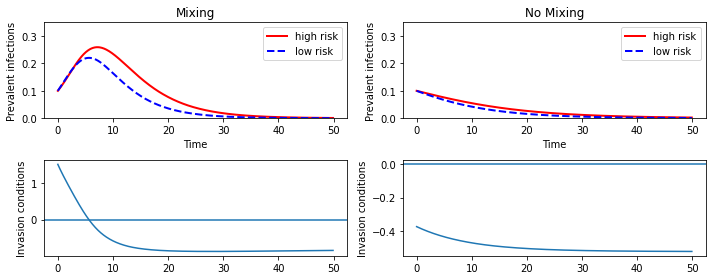

In [4]:
#--create a figure with two panes.
#--The panes are organized as one row and two columns and the size of the figure is (10,4)
fig,axs = plt.subplots(2,2, figsize=(10,4))

#---------------------------------------------------------------------------------------------------
#--MIXING SCENARIO
#---------------------------------------------------------------------------------------------------
ax=axs[0,0]
infected_highrisk_mix = disease_states_mix[1,:] #--< why (take a look at the function sir_HL)?
infected_lowrisk_mix  = disease_states_mix[4,:] #--< why (take a look at the function sir_HL)?

#--plot the time units versus the proportion of prevalant infections. 
#--The high risk group is plotted in red and the low risk group is plotted in blue. 
#--We also include a label that can be used for a legend. 
ax.plot( times_mix, infected_highrisk_mix, color="red", ls="-"  , lw=2, label="high risk")
ax.plot( times_mix, infected_lowrisk_mix , color="blue", ls="--", lw=2, label="low risk")

#--Create a simple legend
ax.legend()

#--Create a simple title 
ax.set_title("Mixing")

#--Set the ylimits to start at 0.00 and end at 0.35
ax.set_ylim(0,0.35)

#--Label y and x labels
ax.set_ylabel("Prevalent infections", fontsize=10)
ax.set_xlabel("Time", fontsize=10)

#---------------------------------------------------------------------------------------------------
#--NO MIXING SCENARIO
#---------------------------------------------------------------------------------------------------
ax=axs[0,1] #--select the second pane for the no mixing group and assign this pane the variable ax
infected_highrisk_nomix = disease_states_nomix[1,:] 
infected_lowrisk_nomix  = disease_states_nomix[4,:]

#--same plots but for the no mixing scenario
ax.plot( times_nomix, infected_highrisk_nomix, color="red", ls="-"  , lw=2, label="high risk")
ax.plot( times_nomix, infected_lowrisk_nomix , color="blue", ls="--", lw=2, label="low risk")

#--Create legend and title 
ax.legend()
ax.set_title("No Mixing")

#--Set the ylimits to start at 0.00 and end at 0.35
ax.set_ylim(0,0.35)

#--Label y and x labels
ax.set_ylabel("Prevalent infections", fontsize=10)
ax.set_xlabel("Time", fontsize=10)

#--------------------------------------------------------------------------------------------------
# Plot the Invasion consitions for low risk group for MIX
#--------------------------------------------------------------------------------------------------
infected_highrisk_mix   = disease_states_mix[1,:]
infected_lowrisk_mix    = disease_states_mix[4,:]
susceptible_lowrisk_mix = disease_states_mix[3,:]

contact_params = (1./4 , 1./6 , 1./2)

lambda1,lambda2,omega = contact_params
invasion = susceptible_lowrisk_mix*( (lambda1/gamma) + (omega/gamma)*(Nhigh/Nlow)*(infected_highrisk_mix/infected_lowrisk_mix))-1


ax = axs[1,0]
ax.plot(times_mix,invasion)
ax.axhline(0)
ax.set_ylabel("Invasion conditions")

#--------------------------------------------------------------------------------------------------
# Plot the Invasion consitions for low risk group for NOMIX
#--------------------------------------------------------------------------------------------------
infected_highrisk_nomix   = disease_states_nomix[1,:]
infected_lowrisk_nomix    = disease_states_nomix[4,:]
susceptible_lowrisk_nomix = disease_states_nomix[3,:]

contact_params = (1./4 , 1./6 , 0)

lambda1,lambda2,omega = contact_params
invasion = susceptible_lowrisk_nomix*( (lambda1/gamma) + (omega/gamma)*(Nhigh/Nlow)*(infected_highrisk_nomix/infected_lowrisk_nomix))-1

ax = axs[1,1]
ax.plot(times_nomix,invasion)
ax.axhline(0)
ax.set_ylabel("Invasion conditions")

#--Display the plot
fig.set_tight_layout(True)
plt.show()

### Questions for self assessment. 
1. Why is the proportion of prevalent infections larger in the high risk group compared to the low risk group? What parameters describe this difference? 
2. In the "No mixing" scenario, what is the reproduction number $\mathcal{R}_{0}$ for the low risk and high risk group?
3. What part of the code controls the solid line and dashed line in the above plot?